In [1]:
import os
import csv
import networkx as nx
from matplotlib import pyplot as plt

In [5]:
# print (os.getcwd()) 
# os.chdir(path)

### Load the data 
Now we are ready to load the data from the chapter 4 folder. These are the data sets related to the Legislative Bills.

In [6]:
with open('legislators.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('cosponsors.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [7]:
display(nodes[:5])
display(edges[:5])

[['BF1', 'R', 'M', 'BillFlores', '1', '4'],
 ['BF2', 'R', 'M', 'BlakeFarenthold', '2', '4'],
 ['BG', 'R', 'M', 'BobGoodlatte', '3', '2'],
 ['BL', 'R', 'M', 'BillyLong', '4', '4'],
 ['CC', 'R', 'M', 'CurtClawson', '5', '1']]

[('BF1', 'BF2'), ('BF1', 'BG'), ('BF1', 'BL'), ('BF1', 'CC'), ('BF1', 'CH')]

In [8]:
print(len(node_names))

35


In [9]:
print(len(edges))

881


### Data Conversion
Convert the data frame to networkx format. We use the legislators as the node attributes. This is not a directed graph.

https://networkx.github.io/documentation/networkx-1.10/reference/classes.graph.html

In [11]:
# initialize a graph object
G1 = nx.Graph()

In [12]:
# add your list of nodes and edges
G1.add_nodes_from(node_names)
G1.add_edges_from(edges)

In [15]:
# get basic info about your newly creaated network
print(nx.info(G1))

Graph with 35 nodes and 446 edges


Notice the number of edges is now 446, instead of 881. This is because the graph is automatically simplified, i.e., duplicate edges or ties are removed.

https://networkx.github.io/documentation/stable/reference/functions.html

In [16]:
#create an empty dictionary for each attribute
party_dict = {}
gender_dict = {}
legislator_dict = {}
num_dict = {}
tenure_dict = {}

# loop through list of nodes, one row at a time
for node in nodes:
    # Access the correct item, add it to the corresponding dictionary
    party_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    legislator_dict[node[0]] = node[3]
    num_dict[node[0]] = int(node[4])
    tenure_dict[node[0]] = int(node[5])
    
# Add each dictionary as a node attribut to the Graph object
nx.set_node_attributes(G1, party_dict, 'Party')
nx.set_node_attributes(G1, gender_dict, 'Gender')
nx.set_node_attributes(G1, legislator_dict, 'Legislator')
nx.set_node_attributes(G1, num_dict, 'Num')
nx.set_node_attributes(G1, tenure_dict, 'Tenure')

### Visualize the Data
Plot with the default layout manager

https://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

In [17]:
# node colour is either set to red when party is R and blue when party is D  
# or set to yellow when gender is male and green when gender is female
party_color = ["Red" if G1.nodes[n]["Party"] == "R" else "Blue" for n in G1.nodes] 
gender_color = ["Yellow" if G1.nodes[n]["Gender"] == "M" else "Green" for n in G1.nodes]

In [18]:
# fixing the size of the figure 
f_default_party = plt.figure(figsize = (12, 12))

# Draw the network
nx.draw_networkx(G1, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 

# Add title to the plot
plt.title("Default layout\n(Democrats = Blue; Republicans = Red)", loc='center')

plt.draw()

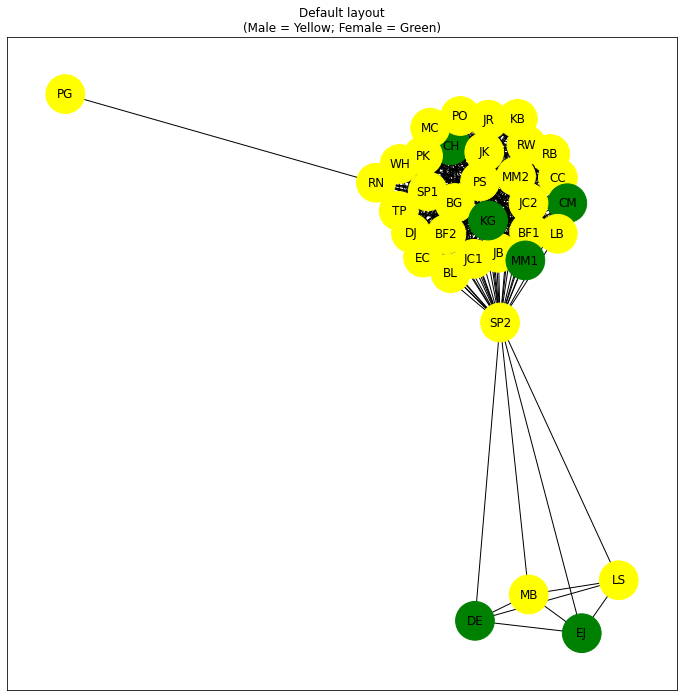

In [19]:
# fixing the size of the figure 
f_default_tenure = plt.figure(figsize = (12, 12))

# Draw the network
nx.draw_networkx(G1, node_color = gender_color, with_labels = True, node_size = 1500, font_size = 12) 

# Add title to the plot
plt.title("Default layout\n(Male = Yellow; Female = Green)", loc='center')

plt.draw()

### Try different layout managers

In [20]:
# prints out list of all different layout options 
print("The various layout options are:") 
print([x for x in nx.__dir__() if x.endswith('_layout')]) 

The various layout options are:
['bipartite_layout', 'circular_layout', 'kamada_kawai_layout', 'random_layout', 'rescale_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'planar_layout', 'fruchterman_reingold_layout', 'spiral_layout', 'multipartite_layout']


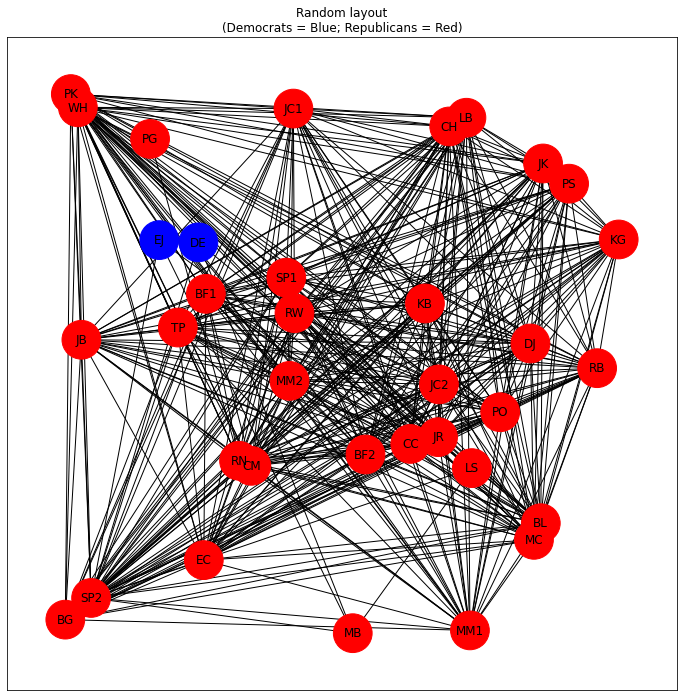

In [21]:
f_random = plt.figure(figsize = (12, 12)) 
pos = nx.random_layout(G1) 
  
# demonstrating random layout 
nx.draw_networkx(G1, pos, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 
plt.title("Random layout\n(Democrats = Blue; Republicans = Red)", loc='center')
plt.draw()

In [22]:
f_circular = plt.figure(figsize = (12, 12)) 
pos = nx.circular_layout(G1) 
  
# demonstrating circular_layout 
nx.draw_networkx(G1, pos, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 
plt.title("Circular layout\n(Democrats= Blue; Republicans=Red)", loc='center')
plt.draw()

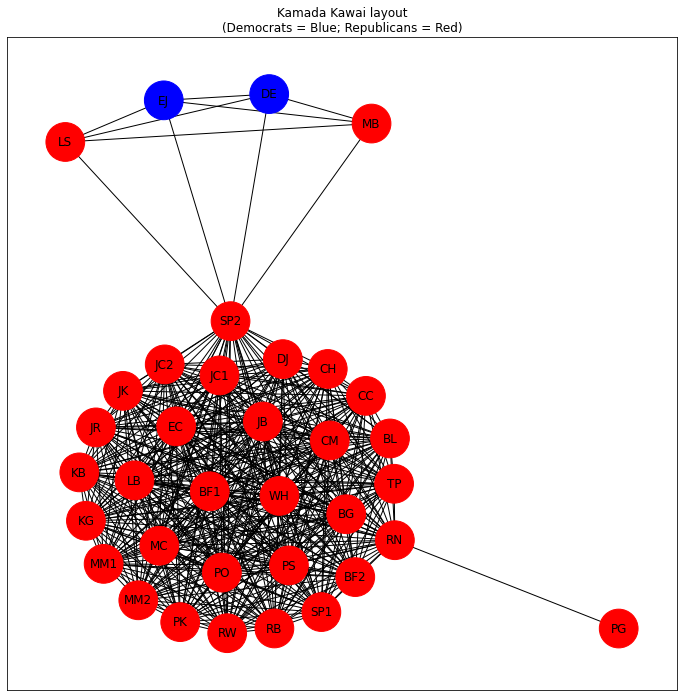

In [23]:
f_kamada_kawai = plt.figure(figsize = (12, 12)) 
pos = nx.kamada_kawai_layout(G1) 
 
# demonstrating kamada_kawai_layout 
nx.draw_networkx(G1, pos, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 
plt.title("Kamada Kawai layout\n(Democrats = Blue; Republicans = Red)", loc='center')
plt.draw()


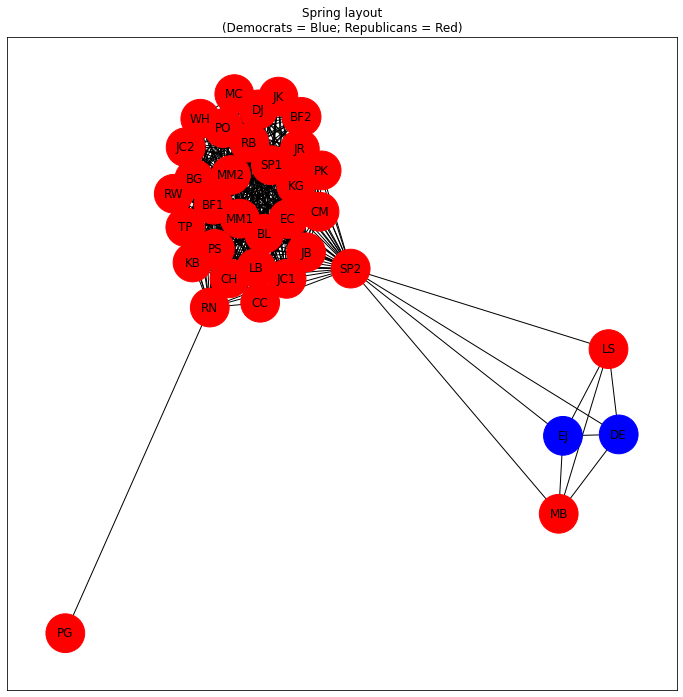

In [24]:
f_spring = plt.figure(figsize = (12, 12)) 
pos = nx.spring_layout(G1) 
  
# demonstrating spring_layout 
nx.draw_networkx(G1, pos, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 
plt.title("Spring layout\n(Democrats = Blue; Republicans = Red)", loc='center')
plt.draw()

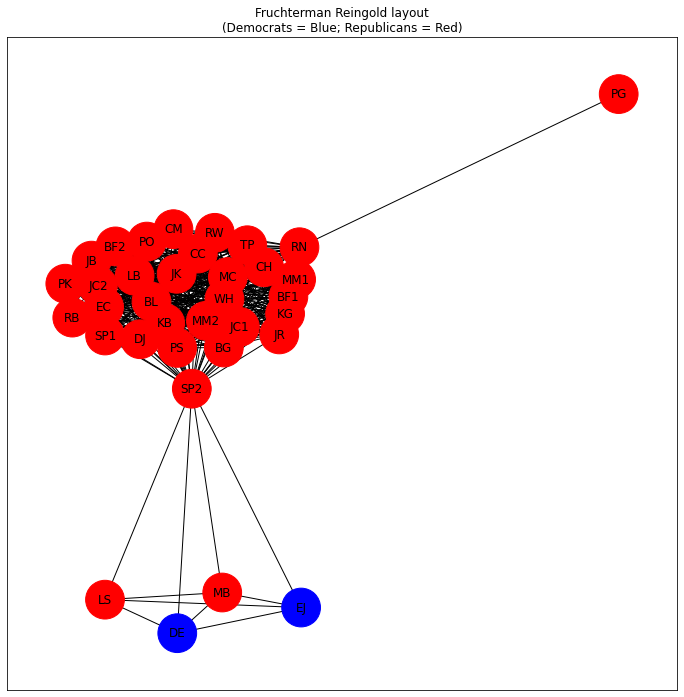

In [25]:
f_fruchterman_reingold = plt.figure(figsize = (12, 12)) 
pos = nx.fruchterman_reingold_layout(G1) 
  
# demonstrating fruchterman_reingold_layout
nx.draw_networkx(G1, pos, node_color = party_color, with_labels = True, node_size = 1500, font_size = 12) 
plt.title("Fruchterman Reingold layout\n(Democrats = Blue; Republicans = Red)", loc='center')
plt.show()

### Saving plots using matplotlib
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html

In [26]:
f_default_party.savefig("Default_layout_partywise.png")

- Supported Formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

- Try to download the other plots using the different formats

##### Visualize Network in 3d
For creating a 3D network plot we will use the igraph and plotly packages.

https://igraph.org/python/doc/tutorial/tutorial.html

https://plotly.com/python/v3/3d-network-graph/#

- You need to install python-igrpah and chart_studio for this section, if you do not have them installed already.
- If you still run into the following error while creating the graph object: AttributeError: module 'igraph' has no attribute 'Graph', please uninstall python-igraph and install again.
https://igraph.org/python/doc/tutorial/install.html

In [28]:
# !python -m pip uninstall python-igraph --yes


In [29]:
# pip install python-igraph

  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9076 sha256=36cedc002995282aee8d78fc54d4fc6001d005d1f2e8421bf4a65f667672f9d2
  Stored in directory: c:\users\13193\appdata\local\pip\cache\wheels\dc\07\ac\bff79052fd6222d1239b228cd24a47222f227c2350f9c4df01
Successfully built python-igraph
Note: you may need to restart the kernel to use updated packages.


In [30]:
 pip install chart_studio

In [31]:
import igraph as ig
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go

In [32]:
# Let us now get the data and transform it in a way that can be used to draw the 3D network.

In [35]:
cosponsors = pd.read_csv("cosponsors.csv")
legislators = pd.read_csv("legislators.csv")

rep_list = legislators["ID"].tolist()
rep_dict = {}
counter = 0
for i in rep_list:
    rep_dict.update({i: counter})
    counter = counter + 1
cosponsors = cosponsors.replace({"Rep1": rep_dict})
cosponsors = cosponsors.replace({"Rep2": rep_dict})

c_json = cosponsors.to_dict(orient = 'records')
l_json = legislators.to_dict(orient = 'records')

data = {"nodes": l_json, "edges": c_json}

In [36]:
c_json

[{'Rep1': 0, 'Rep2': 1},
 {'Rep1': 0, 'Rep2': 2},
 {'Rep1': 0, 'Rep2': 3},
 {'Rep1': 0, 'Rep2': 4},
 {'Rep1': 0, 'Rep2': 5},
 {'Rep1': 0, 'Rep2': 6},
 {'Rep1': 0, 'Rep2': 8},
 {'Rep1': 0, 'Rep2': 9},
 {'Rep1': 0, 'Rep2': 11},
 {'Rep1': 0, 'Rep2': 12},
 {'Rep1': 0, 'Rep2': 13},
 {'Rep1': 0, 'Rep2': 14},
 {'Rep1': 0, 'Rep2': 15},
 {'Rep1': 0, 'Rep2': 16},
 {'Rep1': 0, 'Rep2': 17},
 {'Rep1': 0, 'Rep2': 18},
 {'Rep1': 0, 'Rep2': 20},
 {'Rep1': 0, 'Rep2': 21},
 {'Rep1': 0, 'Rep2': 22},
 {'Rep1': 0, 'Rep2': 23},
 {'Rep1': 0, 'Rep2': 24},
 {'Rep1': 0, 'Rep2': 25},
 {'Rep1': 0, 'Rep2': 26},
 {'Rep1': 0, 'Rep2': 27},
 {'Rep1': 0, 'Rep2': 28},
 {'Rep1': 0, 'Rep2': 29},
 {'Rep1': 0, 'Rep2': 30},
 {'Rep1': 0, 'Rep2': 31},
 {'Rep1': 0, 'Rep2': 32},
 {'Rep1': 1, 'Rep2': 0},
 {'Rep1': 1, 'Rep2': 2},
 {'Rep1': 1, 'Rep2': 3},
 {'Rep1': 1, 'Rep2': 4},
 {'Rep1': 1, 'Rep2': 5},
 {'Rep1': 1, 'Rep2': 6},
 {'Rep1': 1, 'Rep2': 8},
 {'Rep1': 1, 'Rep2': 9},
 {'Rep1': 1, 'Rep2': 11},
 {'Rep1': 1, 'Rep2': 12},
 {

In [37]:
l_json

[{'ID': 'BF1',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'BillFlores',
  'Num': 1,
  'Tenure': 4},
 {'ID': 'BF2',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'BlakeFarenthold',
  'Num': 2,
  'Tenure': 4},
 {'ID': 'BG',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'BobGoodlatte',
  'Num': 3,
  'Tenure': 2},
 {'ID': 'BL',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'BillyLong',
  'Num': 4,
  'Tenure': 4},
 {'ID': 'CC',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'CurtClawson',
  'Num': 5,
  'Tenure': 1},
 {'ID': 'CH',
  'Party': 'R',
  'Gender': 'F',
  'Legislator': 'CresentHardy',
  'Num': 6,
  'Tenure': 0},
 {'ID': 'CM',
  'Party': 'R',
  'Gender': 'F',
  'Legislator': 'CandiceMiller',
  'Num': 7,
  'Tenure': 12},
 {'ID': 'DE',
  'Party': 'D',
  'Gender': 'F',
  'Legislator': 'DonnaEdwards',
  'Num': 8,
  'Tenure': 7},
 {'ID': 'DJ',
  'Party': 'R',
  'Gender': 'M',
  'Legislator': 'DavidJolly',
  'Num': 9,
  'Tenure': 1},
 {'ID': 'EC',
  'Party': 'R',
  'Gende

In [38]:
# Get the number of nodes
N = len(data['nodes'])

#Define the list of edges and the Graph object from Edges
L = len(data['edges'])
Edges = [(data['edges'][k]['Rep1'], data['edges'][k]['Rep2']) for k in range(L)]

G2 = ig.Graph(Edges, directed = False)

In [39]:
data['nodes'][0]

{'ID': 'BF1',
 'Party': 'R',
 'Gender': 'M',
 'Legislator': 'BillFlores',
 'Num': 1,
 'Tenure': 4}

In [40]:
# Extract the node attributes, "ID" and "Party" (You can use any other attribute other than party, but keep the ID always)
labels = []
party = []
for node in data['nodes']:
    labels.append(node['ID'])
    party.append(node['Party'])

# Give your choice of color for the attribute
group_color = ["red" if n == "R" else "blue" for n in party]

In [41]:
# Get the node positions, set by the Kamada-Kawai layout for 3D graphs
# You can change the layout algorithm and play around

layt = G2.layout('kk3d')

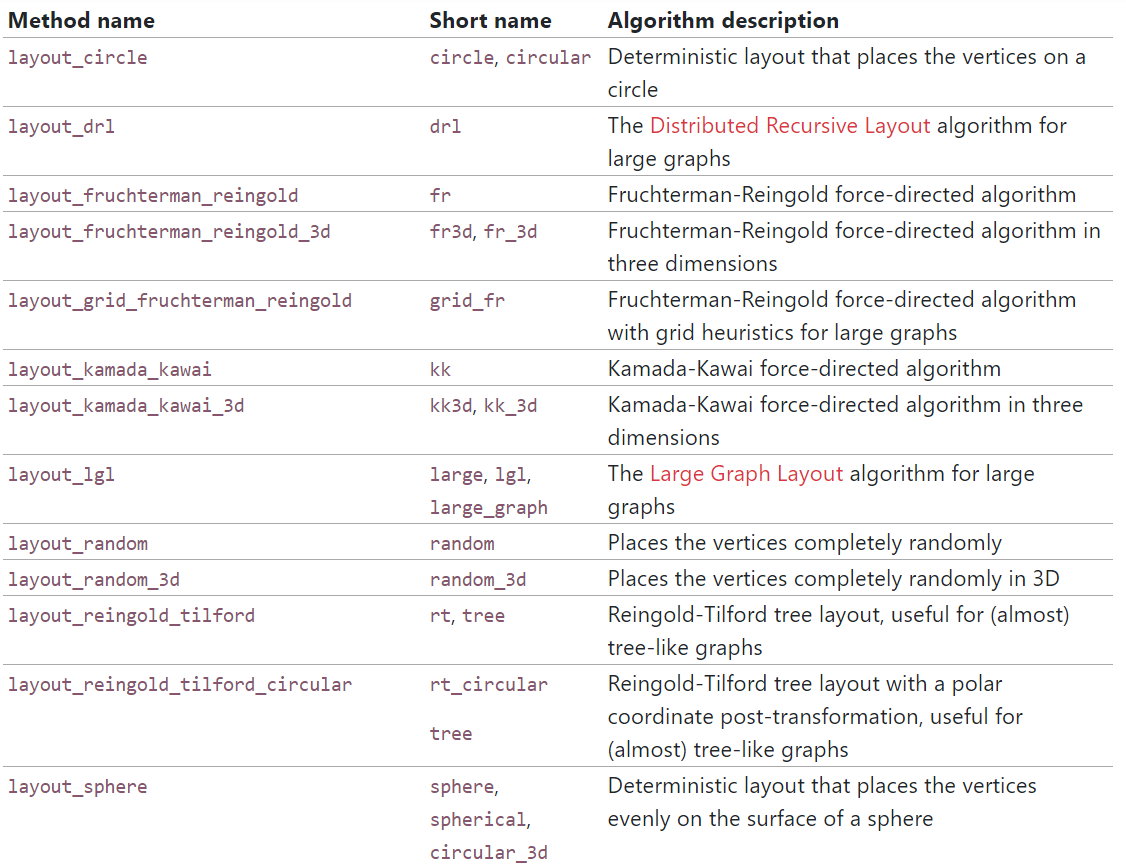

In [42]:
#list  of all algorithms

from IPython.display import Image
Image(filename = 'Layout_Algorithms.png')


In [43]:
# layt is a list of three elements lists (the coordinates of nodes)
layt[5]

[1.0695867900570457, -0.2863454769963123, -1.400108731304263]

In [44]:
# Set data for the Plotly plot of the graph
Xn = [layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn = [layt[k][1] for k in range(N)]# y-coordinates
Zn = [layt[k][2] for k in range(N)]# z-coordinates
Xe = []
Ye = []
Ze = []
for e in Edges:
    Xe += [layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye += [layt[e[0]][1],layt[e[1]][1], None]
    Ze += [layt[e[0]][2],layt[e[1]][2], None]
    
trace1 = go.Scatter3d(x = Xe, y = Ye, z = Ze, 
                      mode = 'lines', line = dict(color = 'rgb(125,125,125)', width = 1), 
                      hoverinfo='none'
                     )

trace2 = go.Scatter3d(x = Xn, y = Yn, z = Zn, 
                      mode = 'markers+text', marker = dict(symbol = 'circle', size = 10, color = group_color), 
                      text = labels,
                      hoverinfo = "none"
                     )

axis = dict(showbackground = False, showline = False, showgrid = False, showticklabels = False, title = '')

layout = go.Layout(title = "Kamada Kawai 3D layout (Democrats = Blue; Republicans = Red)",
                   width = 1000, height = 1000, showlegend = False,
                   scene = dict(xaxis = dict(axis), yaxis = dict(axis), zaxis = dict(axis), ),
                   hovermode = 'closest', )

data = [trace1, trace2]

In [45]:
# Show the plot
fig = go.Figure(data = data, layout = layout)
fig.show()
# save screenshot by clicking on camera in top right-hand corner

In [46]:
layt = G2.layout('fr3d')

In [47]:
# Set data for the Plotly plot of the graph
Xn = [layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn = [layt[k][1] for k in range(N)]# y-coordinates
Zn = [layt[k][2] for k in range(N)]# z-coordinates
Xe = []
Ye = []
Ze = []
for e in Edges:
    Xe += [layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye += [layt[e[0]][1],layt[e[1]][1], None]
    Ze += [layt[e[0]][2],layt[e[1]][2], None]
    
trace1 = go.Scatter3d(x = Xe, y = Ye, z = Ze, 
                      mode = 'lines', line = dict(color = 'rgb(125,125,125)', width = 1), 
                      hoverinfo='none'
                     )

trace2 = go.Scatter3d(x = Xn, y = Yn, z = Zn, 
                      mode = 'markers+text', marker = dict(symbol = 'circle', size = 10, color = group_color), 
                      text = labels,
                      hoverinfo = "none"
                     )

axis = dict(showbackground = False, showline = False, showgrid = False, showticklabels = False, title = '')

layout = go.Layout(title = "Fruchterman Reingold 3D layout (Democrats = Blue; Republicans = Red)",
                   width = 1000, height = 1000, showlegend = False,
                   scene = dict(xaxis = dict(axis), yaxis = dict(axis), zaxis = dict(axis), ),
                   hovermode = 'closest', )

data = [trace1, trace2]

In [48]:
# Show the plot
fig = go.Figure(data = data, layout = layout)
fig.show()